# Canadian Rental Prices EDA

## 1. Introduction

This notebook analyses the data of the 2024 rental prices across Canada.

**About the dataset**

For this project, we will work with the dataset named *25000+ Canadian rental housing market June 2024* that can be found [here](https://www.kaggle.com/datasets/sergiygavrylov/25000-canadian-rental-housing-market-june-2024).

The feature engineering and data processing will be done in [this notebook](DataPreprocessing.ipynb).

The regression model will be done in [this notebook](Regression.ipynb).

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [7]:
# Set option to display full value of column
pd.set_option('display.max_colwidth', None)

## 2. Data Exploration

In [9]:
# Load data
df = pd.read_csv('../Data/canada_rent.csv')
df.shape

(25771, 18)

In [10]:
df.head()

,rentfaster_id,city,province,address,latitude,longitude,lease_term,type,price,beds,baths,sq_feet,link,furnishing,availability_date,smoking,cats,dogs
0,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2495.0,2 Beds,2.5,1403,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-friendly/468622,Unfurnished,Immediate,Non-Smoking,True,True
1,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2695.0,3 Beds,2.5,1496,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-friendly/468622,Unfurnished,Immediate,Non-Smoking,True,True
2,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2295.0,2 Beds,2.5,1180,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-friendly/468622,Unfurnished,Immediate,Non-Smoking,True,True
3,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2095.0,2 Beds,2.5,1403,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-friendly/468622,Unfurnished,November 18,Non-Smoking,True,True
4,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2495.0,2 Beds,2.5,1403,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-friendly/468622,Unfurnished,Immediate,Non-Smoking,True,True


In [11]:
df.sample(5)

,rentfaster_id,city,province,address,latitude,longitude,lease_term,type,price,beds,baths,sq_feet,link,furnishing,availability_date,smoking,cats,dogs
6090,545125,Edmonton,Alberta,5308 - 147th Ave,53.610376,-113.423206,Long Term,Apartment,1165.0,1 Bed,1,677,/ab/edmonton/rentals/apartment/1-bedroom/casselman/pet-friendly/545125,Unfurnished,June 15,Non-Smoking,True,True
8593,561691,Sherwood Park,Alberta,2014 Sherwood Drive,53.526658,-113.295551,Long Term,Apartment,2426.0,2 Beds,2,1011,/ab/sherwood-park/rentals/apartment/2-bedrooms/pet-friendly/561691,Unfurnished,Immediate,Non-Smoking,True,True
11270,570709,Calgary,Alberta,203 Midlawn Close Southeast,50.919463,-114.065780,Negotiable,Main Floor,2000.0,2 Beds,1.5,1130,/ab/calgary/rentals/main-floor/2-bedrooms/midnapore/non-smoking/570709,Unfurnished,Immediate,Non-Smoking,False,False
4610,565862,Calgary,Alberta,Thorncliffe,51.108843,-114.073199,Long Term,Duplex,1950.0,2 Beds,1,NaN,/ab/calgary/rentals/duplex/2-bedrooms/thorncliffe/non-smoking/565862,Unfurnished,Negotiable,Non-Smoking,False,False
3452,118783,Calgary,Alberta,2631 11 AVE NW,51.061185,-114.124459,Long Term,House,3200.0,3 Beds,1,1275,/ab/calgary/rentals/house/3-bedrooms/st-andrews-heights/pet-friendly/118783,Unfurnished,July 01,Non-Smoking,True,True


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25771 entries, 0 to 25770
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rentfaster_id      25771 non-null  int64  
 1   city               25771 non-null  object 
 2   province           25771 non-null  object 
 3   address            25646 non-null  object 
 4   latitude           25771 non-null  float64
 5   longitude          25771 non-null  float64
 6   lease_term         25725 non-null  object 
 7   type               25771 non-null  object 
 8   price              25771 non-null  float64
 9   beds               25639 non-null  object 
 10  baths              25637 non-null  object 
 11  sq_feet            21659 non-null  object 
 12  link               25771 non-null  object 
 13  furnishing         25771 non-null  object 
 14  availability_date  25759 non-null  object 
 15  smoking            23069 non-null  object 
 16  cats               255

In [13]:
df.describe()

,rentfaster_id,latitude,longitude,price
count,25771.000000,25771.000000,25771.000000,25771.000000
mean,471913.795274,48.903370,-100.332196,2151.624142
std,120330.335865,3.603257,17.917001,972.820941
min,820.000000,40.741802,-128.661880,0.000000
25%,415749.000000,45.418785,-114.074660,1600.000000
50%,522379.000000,50.913739,-113.513905,2045.000000
75%,563397.500000,51.093585,-79.401311,2550.000000
max,572635.000000,62.459246,-52.695472,29990.000000


In [14]:
df.isnull().sum()

rentfaster_id           0
city                    0
province                0
address               125
latitude                0
longitude               0
lease_term             46
type                    0
price                   0
beds                  132
baths                 134
sq_feet              4112
link                    0
furnishing              0
availability_date      12
smoking              2702
cats                  173
dogs                  173
dtype: int64

In [15]:
len(df[df.duplicated()])

6726

## 3. Data Preparation

In [17]:
# Get memory usage before cleaning
nbytes_before = df.memory_usage().sum()
nbytes_before

3711156

### 3.1 Remove duplicates

In [19]:
rows_before = len(df)
df.drop_duplicates(keep='first', inplace=True)
df = df.reset_index(drop=True)
rows_after = len(df)
rows_before, rows_after

(25771, 19045)

There still are a lot of rows with the same Rentfaster ID but with different prices and square feets. Based on the website, it seems to be multiple units in the same building.

In [21]:
# Example of a townhouse with multiple units
df[df['rentfaster_id'] == 468622]

,rentfaster_id,city,province,address,latitude,longitude,lease_term,type,price,beds,baths,sq_feet,link,furnishing,availability_date,smoking,cats,dogs
0,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2495.0,2 Beds,2.5,1403,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-friendly/468622,Unfurnished,Immediate,Non-Smoking,True,True
1,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2695.0,3 Beds,2.5,1496,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-friendly/468622,Unfurnished,Immediate,Non-Smoking,True,True
2,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2295.0,2 Beds,2.5,1180,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-friendly/468622,Unfurnished,Immediate,Non-Smoking,True,True
3,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2095.0,2 Beds,2.5,1403,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-friendly/468622,Unfurnished,November 18,Non-Smoking,True,True
4,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2495.0,2 Beds,2.5,1351,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-friendly/468622,Unfurnished,Immediate,Non-Smoking,True,True


### 3.2 Convert some string columns into non-ordinal categorical columns

In [23]:
# Check unique values
display(df['province'].unique())
display(df['lease_term'].unique())
display(df['type'].unique())
display(df['furnishing'].unique())
display(df['smoking'].unique())

array(['Alberta', 'British Columbia', 'Manitoba', 'New Brunswick',
       'Newfoundland and Labrador', 'Nova Scotia',
       'Northwest Territories', 'Ontario', 'Quebec', 'Saskatchewan'],
      dtype=object)

array(['Long Term', 'Negotiable', 'Short Term', '12 months', 'months',
       '6 months', nan], dtype=object)

array(['Townhouse', 'Apartment', 'Main Floor', 'House', 'Basement',
       'Duplex', 'Storage', 'Condo Unit', 'Room For Rent', 'Loft',
       'Acreage', 'Office Space', 'Parking Spot', 'Vacation Home',
       'Mobile'], dtype=object)

array(['Unfurnished', 'Furnished', 'Negotiable',
       'Unfurnished, Negotiable'], dtype=object)

array(['Non-Smoking', 'Smoke Free Building', nan, 'Negotiable',
       'Smoking Allowed'], dtype=object)

In [24]:
# Fill null values
df['lease_term'] = df['lease_term'].fillna('Unknown')
df['smoking'] = df['smoking'].fillna('Unknown')

In [25]:
# Make sure there are no null values
assert df['province'].isnull().sum() == 0
assert df['lease_term'].isna().sum() == 0
assert df['type'].isna().sum() == 0
assert df['furnishing'].isna().sum() == 0
assert df['smoking'].isna().sum() == 0

In [26]:
# Convert data
df[['province', 'lease_term', 'type', 'furnishing', 'smoking']] = \
    df[['province', 'lease_term', 'type', 'furnishing', 'smoking']].astype('category')

In [27]:
# Display descriptions
df[['province', 'lease_term', 'type', 'furnishing', 'smoking']].describe()

,province,lease_term,type,furnishing,smoking
count,19045,19045,19045,19045,19045
unique,10,7,15,4,5
top,Alberta,Long Term,Apartment,Unfurnished,Non-Smoking
freq,8326,17809,13325,17416,16233


### 3.3 Convert some string columns into ordinal categorical columns

In [29]:
# Check unique values
display(df['beds'].unique())
display(df['baths'].unique())

array(['2 Beds', '3 Beds', 'Studio', '1 Bed', '5 Beds', '4 Beds', nan,
       '6 Beds', 'none Beds', '8 Beds', '7 Beds', '9 Beds'], dtype=object)

array(['2.5', '1', '2', '1.5', '3.5', nan, '4', '3', '5', 'none', '4.5',
       '7.5', '5.5', '6', '6.5', '7', '8', '0'], dtype=object)

In [30]:
# Fill null values
df['beds'] = df['beds'].fillna('Unknown')

df['baths'] = df['baths'].fillna('Unknown')
df['baths'] = df['baths'].replace('none', '0')

In [31]:
# Make sure there are no null values
assert df['beds'].isna().sum() == 0
assert df['baths'].isna().sum() == 0

In [32]:
# Convert data
beds = ['Unknown', 'none Beds', 'Studio', '1 Bed', '2 Beds', '3 Beds', '4 Beds', '5 Beds', '6 Beds', '7 Beds', '8 Beds', '9 Beds']
baths = ['Unknown', '0', '1', '1.5', '2', '2.5', '3', '3.5', '4', '4.5', '5', '5.5', '6', '6.5' , '7', '7.5', '8']

df['beds'] = pd.Categorical(values=df['beds'], categories=beds, ordered=True)
df['baths'] = pd.Categorical(values=df['baths'], categories=baths, ordered=True)

In [33]:
# Display descriptions
df[['beds', 'baths']].describe()

,beds,baths
count,19045,19045
unique,12,17
top,2 Beds,1
freq,7237,12858


### 3.4 Convert some strings columns into boolean columns

To make things simpler, let's assume the null values are false.

In [36]:
# Check unique values
display(df['cats'].unique())
display(df['dogs'].unique())

array([True, False, nan], dtype=object)

array([True, False, nan], dtype=object)

In [37]:
# Convert data
df[['cats', 'dogs']] = df[['cats', 'dogs']].astype('bool')

In [38]:
# Make sure there are no null values
assert df['cats'].isna().sum() == 0
assert df['dogs'].isna().sum() == 0

In [39]:
# Display descriptions
df[['cats', 'dogs']].describe()

,cats,dogs
count,19045,19045
unique,2,2
top,True,True
freq,12956,12408


### 3.5 Convert square feet column to numerical value

In [41]:
nb_null = df['sq_feet'].isna().sum()
all_rows = len(df['sq_feet'])
null_values_ratio = nb_null / all_rows
null_values_ratio

print(f'If we delete all the rows with null square feets, we would loose {null_values_ratio:.2%} of our data. \
A better option would be to fill the missing values with the mean of each type of rental fir each city.')

If we delete all the rows with null square feets, we would loose 15.57% of our data. A better option would be to fill the missing values with the mean of each type of rental fir each city.


In [42]:
# Remove strings from values and convert sq_feet column to float
df['sq_feet'] = df['sq_feet'].str.replace(',', '')
df['sq_feet'] = df['sq_feet'].str.extract(r'(\d+[.\d]*)')
df['sq_feet'] = df['sq_feet'].astype('float')
df['sq_feet'].describe()

count    16076.000000
mean       868.596233
std        491.675660
min          0.000000
25%        600.000000
50%        800.000000
75%       1000.000000
max      11700.000000
Name: sq_feet, dtype: float64

In [43]:
# Fill missing values with mean
df['sq_feet'] = df['sq_feet'].fillna(df.groupby(['province', 'city', 'type'], observed=True)['sq_feet'].transform('mean').iloc[0])
assert df['sq_feet'].isnull().sum() == 0
df['sq_feet'].describe()

count    19045.000000
mean       946.927381
std        487.114967
min          0.000000
25%        634.000000
50%        870.000000
75%       1304.000000
max      11700.000000
Name: sq_feet, dtype: float64

In [44]:
# Print the number of unique values for the rest of the string columns
print(df['city'].nunique())
print(df['address'].nunique())
print(df['link'].nunique())
print(df['availability_date'].nunique())

269
8002
9615
132


We won't categorize the string columns mentionned in the previous cell, as they contain too many unique values.

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19045 entries, 0 to 19044
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   rentfaster_id      19045 non-null  int64   
 1   city               19045 non-null  object  
 2   province           19045 non-null  category
 3   address            18920 non-null  object  
 4   latitude           19045 non-null  float64 
 5   longitude          19045 non-null  float64 
 6   lease_term         19045 non-null  category
 7   type               19045 non-null  category
 8   price              19045 non-null  float64 
 9   beds               19045 non-null  category
 10  baths              19045 non-null  category
 11  sq_feet            19045 non-null  float64 
 12  link               19045 non-null  object  
 13  furnishing         19045 non-null  category
 14  availability_date  19037 non-null  object  
 15  smoking            19045 non-null  category
 16  cats

In [47]:
# Get memory usage improvement
nbytes_after = df.memory_usage().sum()
improvement = (nbytes_before - nbytes_after) / nbytes_before
print(f'There is a {improvement:.2%} decrease in memory usage.')

There is a 58.35% decrease in memory usage.


In [48]:
# Dump cleaned data into a pickle file (for data preprocessing)
df.to_pickle('../Data/cleaned_data.pkl')

## 4. Data Visualization

### 4.1 Correlation between numeric variables

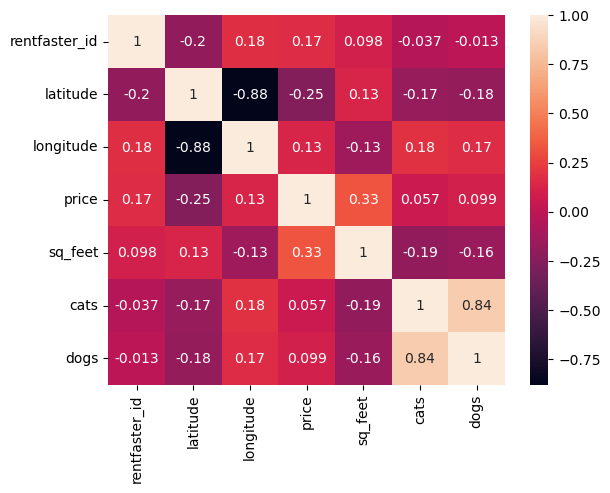

In [51]:
sns.heatmap(df.corr(numeric_only=True), annot=True);

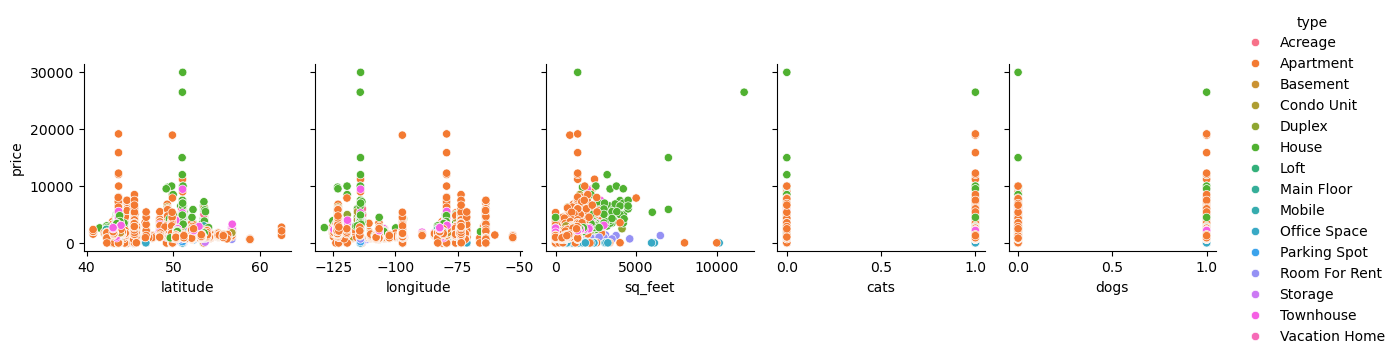

In [52]:
sns.pairplot(df, x_vars=['latitude', 'longitude', 'sq_feet', 'cats', 'dogs'], y_vars=['price'], hue='type');

Based on the correlation coefficient (0.33) and the plots, there seems to be a relationship between the square feet and the price. Also, the places where animals are not accepted seem to be more expensive.

Let's see if the correlation plots change if we filter the data for one province.

In [54]:
quebec = df[df['province'] == 'Quebec']
quebec.head()

,rentfaster_id,city,province,address,latitude,longitude,lease_term,type,price,beds,baths,sq_feet,link,furnishing,availability_date,smoking,cats,dogs
16267,537609,Boisbriand,Quebec,1030 Francs-Bourgeois Street,45.627227,-73.853389,Long Term,Apartment,1674.0,1 Bed,1,1371.060606,/qc/boisbriand/rentals/apartment/1-bedroom/non-smoking/537609,Unfurnished,Immediate,Non-Smoking,False,False
16268,537609,Boisbriand,Quebec,1030 Francs-Bourgeois Street,45.627227,-73.853389,Long Term,Apartment,1853.0,2 Beds,1,1371.060606,/qc/boisbriand/rentals/apartment/1-bedroom/non-smoking/537609,Unfurnished,Immediate,Non-Smoking,False,False
16269,537609,Boisbriand,Quebec,1030 Francs-Bourgeois Street,45.627227,-73.853389,Long Term,Apartment,2541.0,3 Beds,1,1371.060606,/qc/boisbriand/rentals/apartment/1-bedroom/non-smoking/537609,Unfurnished,Immediate,Non-Smoking,False,False
16270,396295,Boisbriand,Quebec,1065 Des Francs-Bourgeois Street,45.628554,-73.855720,Long Term,Apartment,1670.0,1 Bed,1,753.000000,/qc/boisbriand/rentals/apartment/1-bedroom/pet-friendly/396295,Unfurnished,July 01,Non-Smoking,True,True
16271,396295,Boisbriand,Quebec,1065 Des Francs-Bourgeois Street,45.628554,-73.855720,Long Term,Apartment,1905.0,2 Beds,1,1101.000000,/qc/boisbriand/rentals/apartment/1-bedroom/pet-friendly/396295,Unfurnished,Immediate,Non-Smoking,True,True


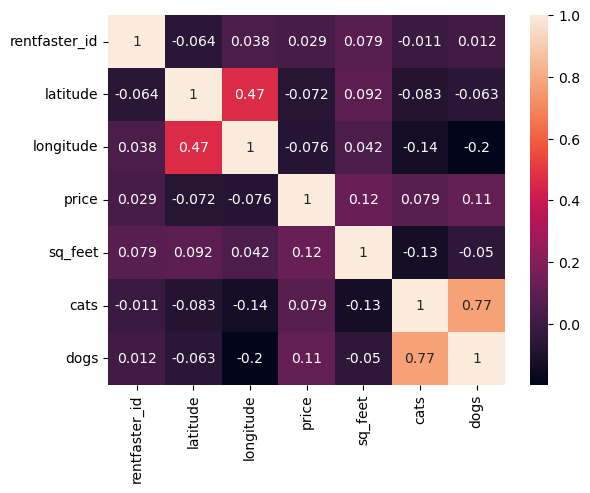

In [55]:
sns.heatmap(quebec.corr(numeric_only=True), annot=True);

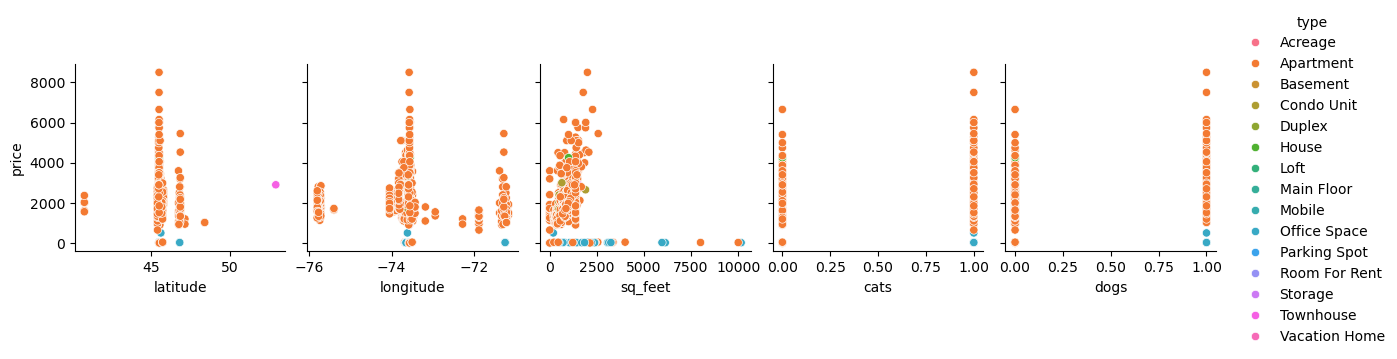

In [56]:
sns.pairplot(quebec, x_vars=['latitude', 'longitude', 'sq_feet', 'cats', 'dogs'], y_vars=['price'], hue='type');

The correlation between the price and the square feet is much weaker for Quebec (0.12) and the rentals where animals are accepted seem to be more expensive. It's interesting to see that most rentals in Quebec are apartments.

Let's filter out data for one city.

In [58]:
montreal = quebec[quebec['city'] == 'Montréal']
montreal.head()

,rentfaster_id,city,province,address,latitude,longitude,lease_term,type,price,beds,baths,sq_feet,link,furnishing,availability_date,smoking,cats,dogs
16604,416658,Montréal,Quebec,2255 Rue Lambert-Closse,45.491792,-73.586197,Long Term,Apartment,2099.0,2 Beds,1,1024.0,/qc/montreal/rentals/apartment/2-bedrooms/pet-friendly/416658,Unfurnished,Immediate,Non-Smoking,True,True
16605,416658,Montréal,Quebec,2255 Rue Lambert-Closse,45.491792,-73.586197,Long Term,Apartment,4132.0,3 Beds,2,1444.0,/qc/montreal/rentals/apartment/2-bedrooms/pet-friendly/416658,Unfurnished,Immediate,Non-Smoking,True,True
16606,562813,Montréal,Quebec,1951 Maisonneuve Boulevard East,45.524582,-73.552851,Long Term,Apartment,1470.0,Studio,1,454.0,/qc/montreal/rentals/apartment/1-bedroom/pet-friendly/562813,Unfurnished,Immediate,Non-Smoking,True,True
16607,562813,Montréal,Quebec,1951 Maisonneuve Boulevard East,45.524582,-73.552851,Long Term,Apartment,1665.0,1 Bed,1,537.0,/qc/montreal/rentals/apartment/1-bedroom/pet-friendly/562813,Unfurnished,Immediate,Non-Smoking,True,True
16608,562813,Montréal,Quebec,1951 Maisonneuve Boulevard East,45.524582,-73.552851,Long Term,Apartment,2180.0,2 Beds,1,813.0,/qc/montreal/rentals/apartment/1-bedroom/pet-friendly/562813,Unfurnished,Immediate,Non-Smoking,True,True


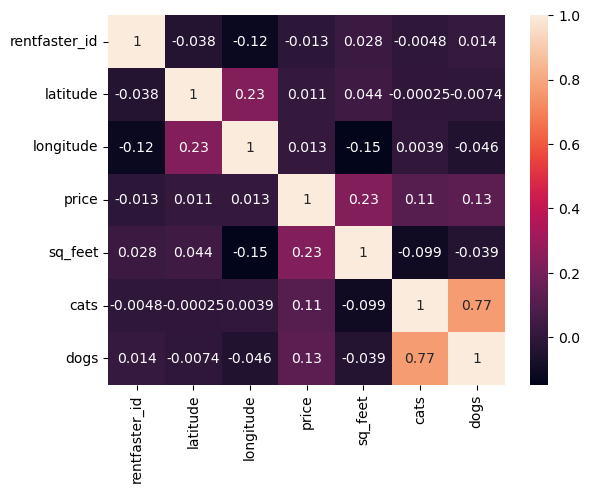

In [59]:
sns.heatmap(montreal.corr(numeric_only=True), annot=True);

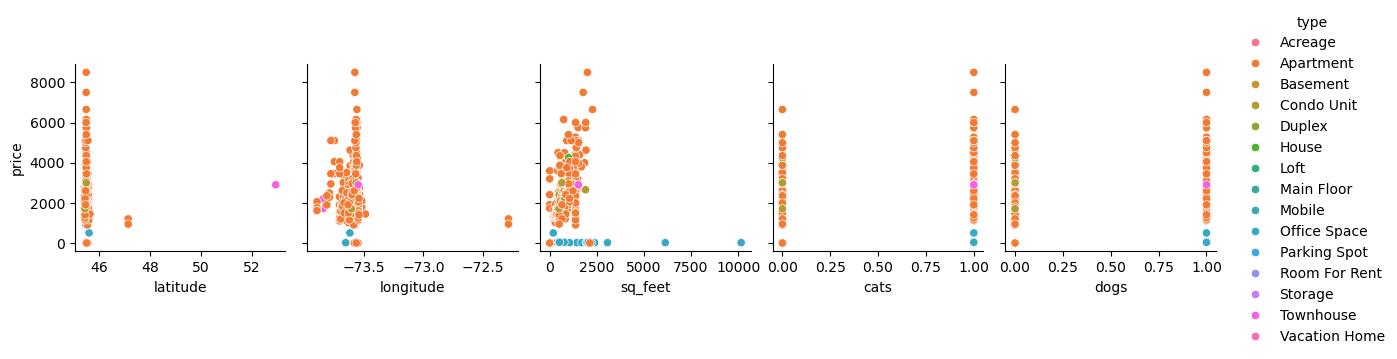

In [60]:
sns.pairplot(montreal, x_vars=['latitude', 'longitude', 'sq_feet', 'cats', 'dogs'], y_vars=['price'], hue='type');

The correlation between the price and the square feet is a bit stronger than the one for Quebec (0.23).

#### 4.2 Distribution of the price by province

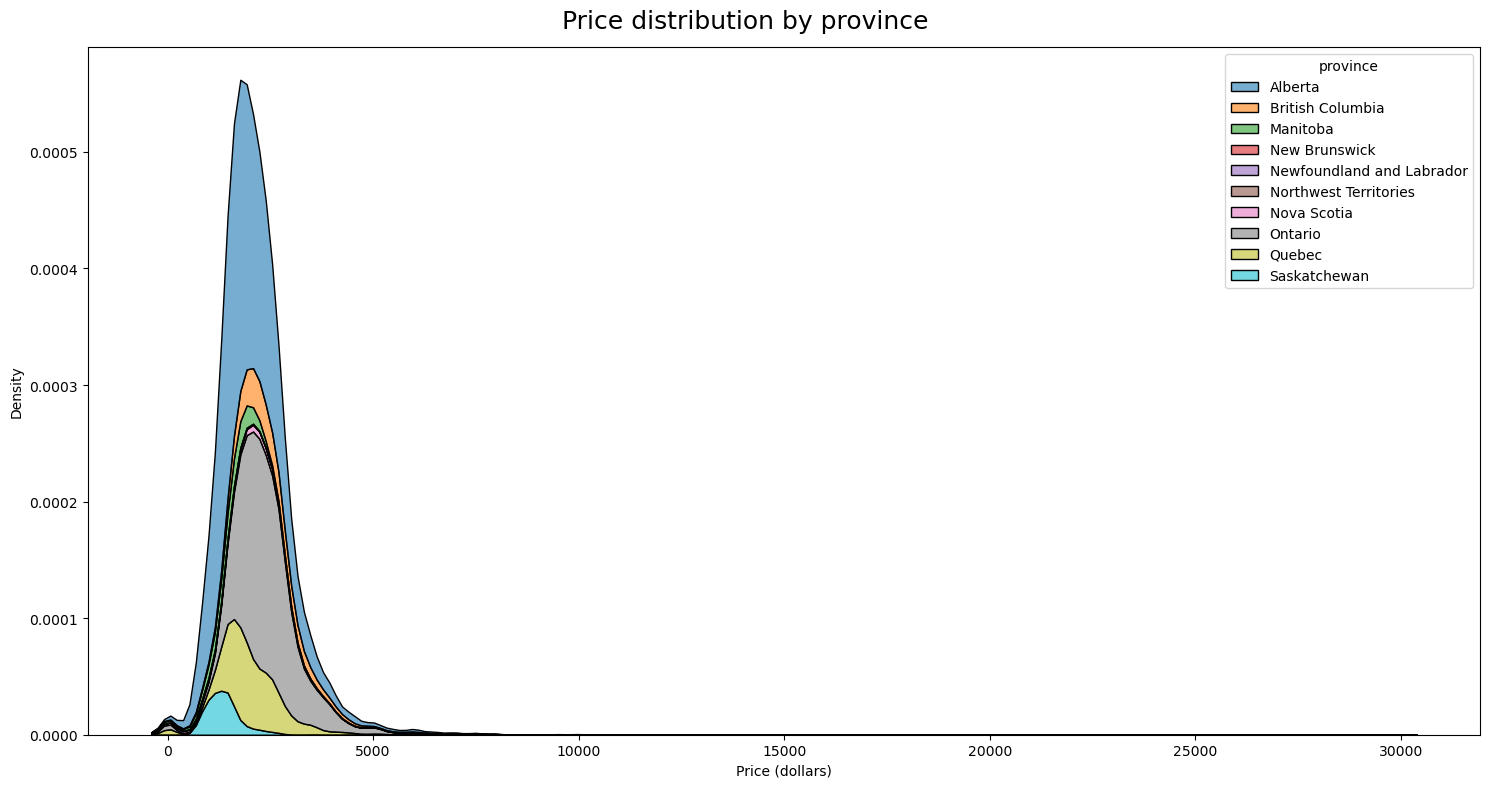

In [63]:
# Plot price distribution by province
fig, ax = plt.subplots(figsize=(15,8))
g = sns.kdeplot(data=df, x='price', hue='province', fill=True, alpha=0.6, multiple='stack', ax=ax)
g.set(xlabel='Price (dollars)')
fig.suptitle('Price distribution by province', fontsize=18)
fig.tight_layout();

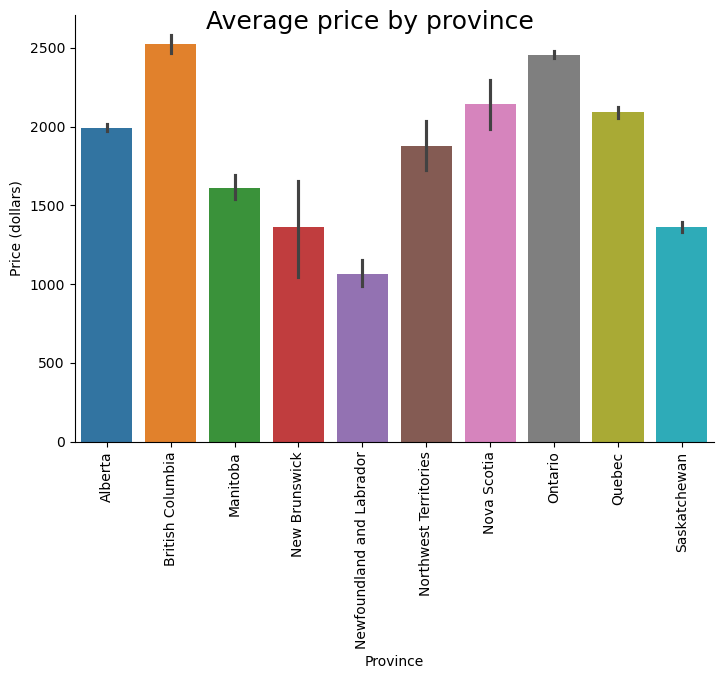

In [64]:
# Plot average price by province
ax = sns.catplot(data=df, x='province', y='price', kind='bar', aspect=1.5, hue='province')
ax.tick_params(axis='x', rotation=90)
ax.fig.suptitle('Average price by province', fontsize=18)
ax.set_xlabels('Province')
ax.set_ylabels('Price (dollars)');

The province with the highest median and average price is British-Columbia.

### 4.3 Price distribution by city

In [67]:
# Get the 5 cities with the most Rentfaster ads
cities_list = list(df['city'].value_counts().head(5).index)
cities_list

['Calgary', 'Edmonton', 'Toronto', 'Montréal', 'Ottawa']

In [68]:
top_cities = df[df['city'].isin(cities_list)]
top_cities.sample(5)

,rentfaster_id,city,province,address,latitude,longitude,lease_term,type,price,beds,baths,sq_feet,link,furnishing,availability_date,smoking,cats,dogs
15881,450787,Toronto,Ontario,55 Triller Ave,43.639962,-79.443710,Long Term,Apartment,1718.3,Studio,1,419.0,/on/toronto/rentals/apartment/1-bedroom/non-smoking/450787,Unfurnished,Immediate,Non-Smoking,False,False
14176,568787,Toronto,Ontario,25 Dalhousie Street and 30 Mutual Street,43.654262,-79.374890,Long Term,Apartment,2890.0,1 Bed,1,503.0,/on/toronto/rentals/apartment/1-bedroom/pet-friendly/568787,Unfurnished,August 01,Unknown,True,True
5146,529631,Edmonton,Alberta,10312 111 Street,53.545038,-113.512722,Long Term,Apartment,1905.0,1 Bed,1,716.0,/ab/edmonton/rentals/apartment/1-bedroom/oliver/pet-friendly/529631,Unfurnished,Immediate,Non-Smoking,True,True
4811,377693,Edmonton,Alberta,10141 124 Street Northwest,53.542826,-113.535529,Long Term,Apartment,1611.0,1 Bed,1,560.0,/ab/edmonton/rentals/apartment/1-bedroom/oliver/pet-friendly/377693,Unfurnished,Immediate,Non-Smoking,True,True
15527,570385,Toronto,Ontario,21 Mayfair Avenue,43.703802,-79.422184,Long Term,Apartment,2900.0,2 Beds,2,1250.0,/on/toronto/rentals/apartment/2-bedrooms/pet-friendly/570385,Unfurnished,September 01,Unknown,True,True


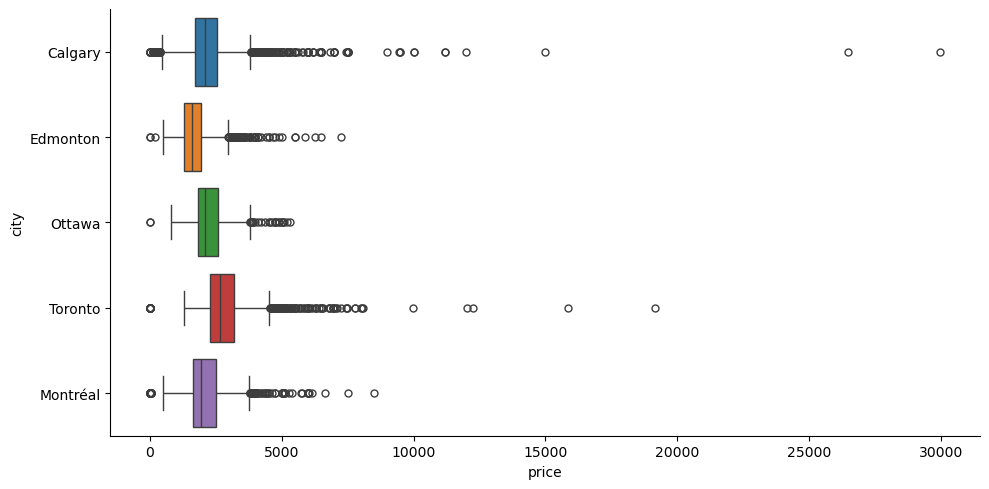

In [69]:
sns.catplot(kind='box', data=top_cities, x='price', y='city', hue='city', aspect=2);

The city with the highest median price is Toronto.

## End